In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

In [25]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool
from bokeh.models import ColumnDataSource
from bokeh.models import Legend
from bokeh.palettes import viridis
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.io import output_file, show, save, curdoc
from bokeh.embed import components

In [3]:
df = pd.read_csv('data1.csv', parse_dates=['Date', 'Time'])

# Plot total run mileage (as of April 26, 2018)

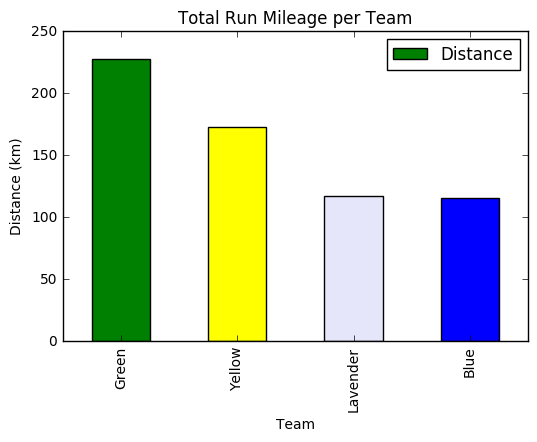

In [4]:
total_run_distance = df[df.Activity == 'Run'].groupby('Team').sum()
total_run_distance = total_run_distance.sort_values(['Distance'], ascending=False).reset_index()
ax = total_run_distance.plot(x='Team', y='Distance', kind='bar', color=total_run_distance['Team'])
ax.set_ylabel('Distance (km)')
ax.set_title('Total Run Mileage per Team')

In [5]:
df_run = df[df.Activity=='Run']

In [6]:
dfrun_cumsum = df_run.groupby(['Team', 'Date']).sum().fillna(0).groupby(level=0).cumsum()
dfrun_cumsum.reset_index(inplace=True)
dfrun_cumsum = dfrun_cumsum.pivot(index='Date', columns='Team', values='Distance')
dfrun_cumsum = dfrun_cumsum.fillna(method='ffill')

# Plot Daily Cumulative Total Run Mileage

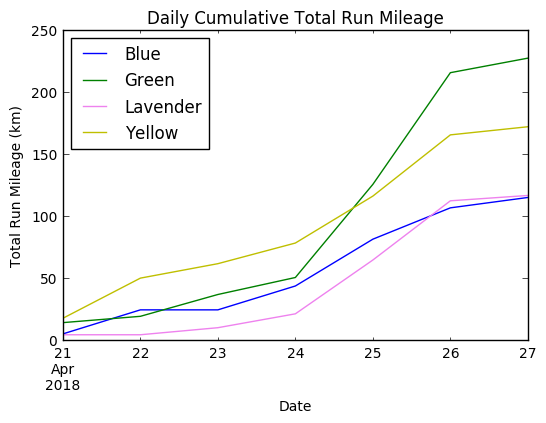

In [7]:
dfrun_cumsum.Blue.plot(c='b')
dfrun_cumsum.Green.plot(c='g')
dfrun_cumsum.Lavender.plot(c='violet')
dfrun_cumsum.Yellow.plot(c='y')
plt.ylabel('Total Run Mileage (km)')
plt.title('Daily Cumulative Total Run Mileage')
plt.legend(loc=2)

### Yellow was on the #1 spot from day 1 to day 4, but it was overthrown by Green since day 5

### What was Green Team's winning strategy? Did they run longer compared to the other teams? Or did they encouraged more members to run? 

### Let's look at the numbers!

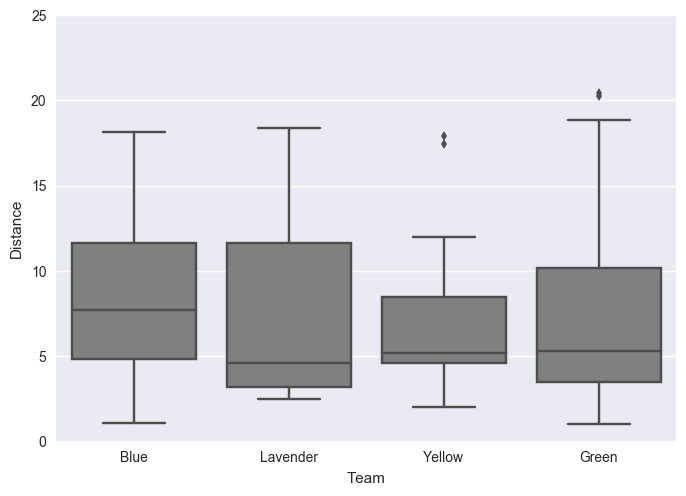

In [8]:
import seaborn as sns
sns.boxplot(x="Team", y="Distance", data=df_run, color='grey')

## Although Green has the highest distance covered in a single run, their mean running distance does not stand out

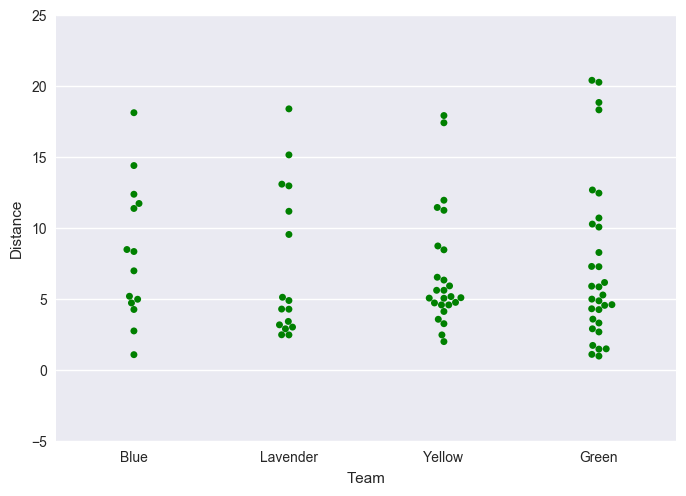

In [9]:
sns.swarmplot(x="Team", y="Distance", data=df_run, color='g')

## However, the swarm plot shows that they have greater data points / number of activities compared to the other teams

In [10]:
df_count = df_run.groupby(['Team', 'Date']).count().fillna(0).groupby(level=0).cumsum()
df_count = df_count[['Activity']]
df_count.reset_index(inplace=True)
df_count = df_count.pivot(index='Date', columns='Team', values='Activity')
df_count = df_count.fillna(method='ffill')

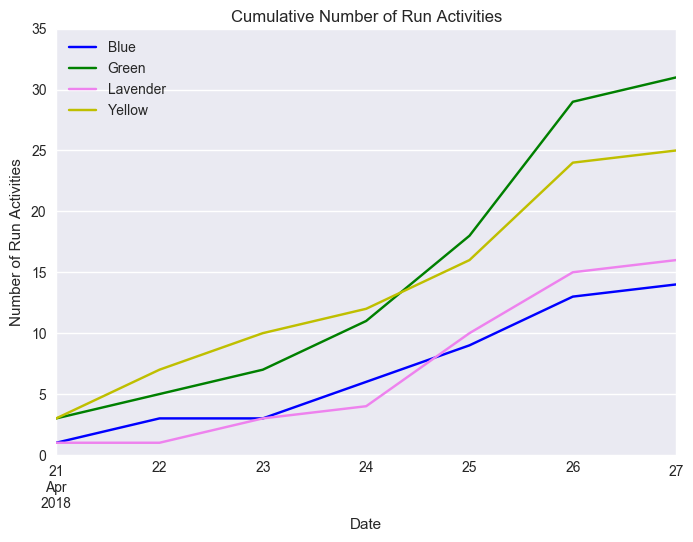

In [11]:
df_count.Blue.plot(c='b')
df_count.Green.plot(c='g')
df_count.Lavender.plot(c='violet')
df_count.Yellow.plot(c='y')
plt.ylabel('Number of Run Activities')
plt.title('Cumulative Number of Run Activities')
plt.legend(loc=2)

### Coincidentally, the team that leads the total number of run activities also leads the total run mileage

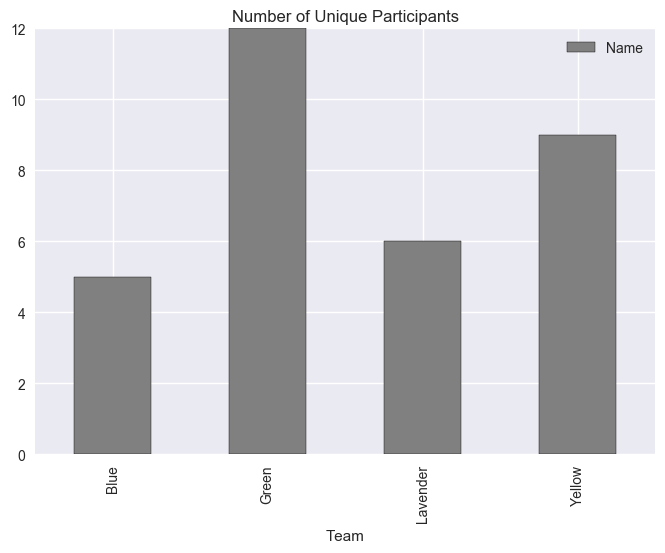

In [12]:
dfa = df_run.groupby(['Team','Name']).count()
dfa = dfa.reset_index()
dfa[['Team','Name']].groupby(['Team']).count().plot(kind='bar', color='gray')
plt.title('Number of Unique Participants')

## Green also have the highest number of unique members participating in the running event.

# It looks like Green claimed their top spot by encouraging more members to run :)

In [13]:
total_run_distance = df[df.Activity == 'Run'].groupby('Team').sum()
total_run_distance = total_run_distance.sort_values(['Distance'], ascending=False).reset_index()
total_run_distance

,Team,Distance
0,Green,227.38
1,Yellow,172.06
2,Lavender,116.64
3,Blue,115.02


In [14]:
top20 = df_run.groupby(['Name']).sum()
top20 = top20.sort_values(by='Distance', ascending=False)
top20 = top20.reset_index()
top20 = top20.loc[0:19,:]
top20.Name.values

array(['Charles De Jesus', 'Aguinaldo Catalan', 'Ferdinand Laguilles',
       'Tintin Espartinez', 'Joy Garcia', 'Fidel See',
       'Maan Carbonel-Caballero', 'Dominicano Dela Rosa', 'Gerry Gerona',
       'Bong Mascardo', 'Mel Labao', 'Rowan Jalmasco', 'Abegail Gatdula',
       'Jimmy Basaysay', 'Marinelle Freo', 'Kenneth Lagamayo',
       'Paolo Digo', 'Marvin Bailon', 'Marilyn Reverente',
       'Gabriel Balonzo'], dtype=object)

In [15]:
dfrun_cumsum = df_run.groupby(['Name', 'Date']).sum().fillna(0).groupby(level=0).cumsum()
dfrun_cumsum.reset_index(inplace=True)
dfrun_cumsum = dfrun_cumsum.pivot(index='Date', columns='Name', values='Distance')
dfrun_cumsum = dfrun_cumsum.fillna(method='ffill')
dfrun_cumsum = dfrun_cumsum.fillna(0)
# dfrun_cumsum[['Charles De Jesus', 'Aguinaldo Catalan', 'Ferdinand Laguilles', 'Fidel See', 'Tintin Espartinez']].plot()
# dfrun_cumsum[['Charles De Jesus', 'Aguinaldo Catalan', 'Ferdinand Laguilles', 'Fidel See', 'Tintin Espartinez']]

In [16]:
dfrun_cumsum = df_run.groupby(['Name', 'Date']).sum().fillna(0).groupby(level=0).cumsum()
dfrun_cumsum.reset_index(inplace=True)
dfrun_cumsum = dfrun_cumsum.pivot(index='Date', columns='Name', values='Distance')
dfrun_cumsum = dfrun_cumsum.fillna(method='ffill')
dfrun_cumsum = dfrun_cumsum.fillna(0)
dfrun_cumsum[top20.Name.values]

Name,Charles De Jesus,Aguinaldo Catalan,Ferdinand Laguilles,Tintin Espartinez,Joy Garcia,Fidel See,Maan Carbonel-Caballero,Dominicano Dela Rosa,Gerry Gerona,Bong Mascardo,Mel Labao,Rowan Jalmasco,Abegail Gatdula,Jimmy Basaysay,Marinelle Freo,Kenneth Lagamayo,Paolo Digo,Marvin Bailon,Marilyn Reverente,Gabriel Balonzo
Date,,,,,,,,,,,,,,,,,,,,
2018-04-21,8.75,4.31,0.00,0.00,3.33,0.00,6.35,0.00,5.87,5.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2018-04-22,26.17,4.31,4.74,3.60,3.33,12.39,11.98,0.00,7.36,12.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2018-04-23,26.17,4.31,8.33,3.60,10.64,12.39,16.76,10.29,7.36,12.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2018-04-24,26.17,15.50,24.98,5.11,10.64,19.90,16.76,10.29,11.63,12.00,11.74,0.00,0.0,0.00,0.00,5.01,0.00,0.00,0.00,0.0
2018-04-25,38.14,32.04,30.92,23.44,31.05,25.11,34.69,22.98,18.92,30.13,26.15,0.00,18.4,2.92,10.08,5.01,0.00,0.00,0.00,0.0
2018-04-26,57.88,49.93,41.62,43.71,41.30,30.49,34.69,30.98,31.39,30.13,26.15,18.85,18.4,18.08,14.70,13.30,11.39,0.00,9.56,8.5
2018-04-27,57.88,54.23,48.17,43.71,41.30,38.85,34.69,31.98,31.39,30.13,26.15,18.85,18.4,18.08,14.70,13.30,11.39,10.72,9.56,8.5


In [17]:
df_test = dfrun_cumsum[['Charles De Jesus', 'Aguinaldo Catalan', 'Ferdinand Laguilles']]

In [18]:
# dfrun_cumsum = dfrun_cumsum.fillna(0)
# dfrun_cumsum.plot()

In [19]:
df_test

Name,Charles De Jesus,Aguinaldo Catalan,Ferdinand Laguilles
Date,,,
2018-04-21,8.75,4.31,0.00
2018-04-22,26.17,4.31,4.74
2018-04-23,26.17,4.31,8.33
2018-04-24,26.17,15.50,24.98
2018-04-25,38.14,32.04,30.92
2018-04-26,57.88,49.93,41.62
2018-04-27,57.88,54.23,48.17


In [20]:


p = figure(plot_width=400, plot_height=400,x_axis_type="datetime")

n = 2
y_vals = df_test['Charles De Jesus'].values
y_vals2 = df_test['Aguinaldo Catalan'].values
x_vals = df_test.index.values
data_dict = {'x':[x_vals,x_vals],
             'y':[y_vals,y_vals2],
             'color':viridis(n),
             'alpha':[0.3]*n,
             'labels' :['Charles De Jesus', 'Aguinaldo Catalan']
            }

source = ColumnDataSource(data_dict)

p.multi_line('x','y',source=source,
             color='color', alpha='alpha', line_width=4,
             hover_line_alpha=1.0,hover_line_color='color', legend='labels')

p.add_tools(HoverTool(show_arrow=False,
                      line_policy='nearest',
                      tooltips=[("Name", '@labels')]
                     ))
show(p)

In [21]:
df_test = dfrun_cumsum[top20.Name.values]
[df_test.index.values]

[array(['2018-04-21T00:00:00.000000000', '2018-04-22T00:00:00.000000000',
        '2018-04-23T00:00:00.000000000', '2018-04-24T00:00:00.000000000',
        '2018-04-25T00:00:00.000000000', '2018-04-26T00:00:00.000000000',
        '2018-04-27T00:00:00.000000000'], dtype='datetime64[ns]')]

In [27]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool
from bokeh.models import ColumnDataSource
from bokeh.models import Legend

p = figure(plot_width=400, plot_height=400,x_axis_type="datetime", title='Individual Cumulative Run Mileage',
           toolbar_location="above", sizing_mode='stretch_both')

df_test = dfrun_cumsum[top20.Name.values]

n = len(df_test.columns)
x_vals = [df_test.index.values]*n
y_vals = [df_test[name].values for name in df_test]
data_dict = {'x':x_vals,
             'y':y_vals,
             'color':viridis(n),
             'alpha':[0.25]*n,
             'labels' :df_test.columns
            }

source = ColumnDataSource(data_dict)

p.multi_line('x','y',source=source,
             color='color', alpha='alpha', line_width=4,
             hover_line_alpha=1.0,hover_line_color='color', legend='labels')

p.add_tools(HoverTool(show_arrow=False,
                      line_policy='nearest',
                      tooltips=[("", '@labels')]
                     ))


p.yaxis.axis_label = "Mileage (km)"
p.xaxis.axis_label = "Date"

new_legend = p.legend[0]
p.legend[0].plot = None
p.add_layout(new_legend, 'right')

output_file("top_20.html", title='PAL25D') 
# show(p)
script, div = components(p)
print(script)
print(div)


<script type="text/javascript">
    (function() {
  var fn = function() {
    Bokeh.safely(function() {
      (function(root) {
        function embed_document(root) {
          var docs_json = {"14b70250-1108-4ad9-b2bd-be8b9ddec85b":{"roots":{"references":[{"attributes":{"months":[0,2,4,6,8,10]},"id":"6ec9598f-4a35-48e0-94d1-f483fd30d004","type":"MonthsTicker"},{"attributes":{"axis_label":"Mileage (km)","formatter":{"id":"47cac719-7d96-486e-9f70-adf76e5dcaaa","type":"BasicTickFormatter"},"plot":{"id":"995d1905-5d8b-4f9e-aac2-078556768808","subtype":"Figure","type":"Plot"},"ticker":{"id":"d5e1b3ee-17b1-418b-97ef-5a7a94f5f020","type":"BasicTicker"}},"id":"61f3596d-1d4a-4482-a84e-6947e0098785","type":"LinearAxis"},{"attributes":{"days":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]},"id":"e556e08e-f259-4ebe-949f-878682695331","type":"DaysTicker"},{"attributes":{"callback":null},"id":"4df9ee75-ccc4-4d1a-9831-7e6eceeb5179","type":"DataRange1d"},{"att

In [23]:


# p = figure(plot_width=400, plot_height=400,x_axis_type="datetime", title='Individual Cumulative Run Mileage',
#            toolbar_location="above", sizing_mode='stretch_both')

# n = len(dfrun_cumsum.columns)
# x_vals = [dfrun_cumsum.index.values]*numlines
# y_vals = [dfrun_cumsum[name].values for name in dfrun_cumsum]
# data_dict = {'x':x_vals,
#              'y':y_vals,
#              'color':viridis(n),
#              'alpha':[0.3]*n,
#              'labels' :dfrun_cumsum.columns
#             }

# source = ColumnDataSource(data_dict)

# p.multi_line('x','y',source=source,
#              color='color', alpha='alpha', line_width=3,
#              hover_line_alpha=1.0,hover_line_color='color', legend='labels')

# p.add_tools(HoverTool(show_arrow=False,
#                       line_policy='nearest',
#                       tooltips=[("", '@labels')]
#                      ))

# p.yaxis.axis_label = "Mileage (km)"
# p.xaxis.axis_label = "Date"

# new_legend = p.legend[0]
# p.legend[0].plot = None
# p.add_layout(new_legend, 'right')
# show(p)

In [24]:
len(dfrun_cumsum.columns)

32